In [41]:
from google.colab import drive

In [42]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Dataset from Drive:**

In [97]:
import h5py

h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r') #opens the file as read only

h5f.keys()
 

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [98]:
# Load the training, test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [99]:

 #Print the shape of training, testing data
print("Training data X Shape:", X_train.shape)
print("Testing data X Shape:", X_test.shape)
print("Training data y Shape:", y_train1.shape)
print("Testing data y Shape:", y_test1.shape)
print("Validation data X Shape:", X_val.shape)
print("Validation data y Shape:", y_val.shape)

Training data X Shape: (42000, 32, 32)
Testing data X Shape: (18000, 32, 32)
Training data y Shape: (42000,)
Testing data y Shape: (18000,)
Validation data X Shape: (60000, 32, 32)
Validation data y Shape: (60000,)


**Understand the basic Image Classification pipeline and the data-driven
approach (train/predict stages):**

In [80]:
import numpy as np
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils import np_utils

In [46]:
np.random.seed(30)

In [47]:
import matplotlib.pyplot as plt

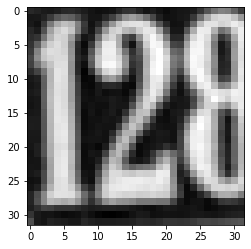

Label:  2


In [58]:
#display the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train1[0])

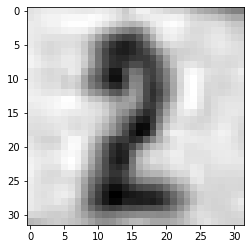

Label:  2


In [59]:
#display the number in the dataset
plt.imshow(X_test[2],cmap='gray')    
plt.show()
print('Label: ', y_test1[2])

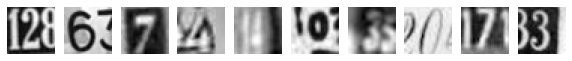

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [57]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

**Data fetching and understand the train/val/test splits:**

In [100]:
X_test = X_test.reshape(X_test.shape[0], 1024) #Reshape data from 2D to 1D i.e 32X32 to 1024
X_train = X_train.reshape(X_train.shape[0], 1024)
X_val=X_val.reshape(X_val.shape[0], 1024)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

print('Training set:', X_train.shape, y_train1.shape)
print('Test set:', X_test.shape, y_test1.shape)
print('Validation Set:',X_val.shape, y_val.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)
Validation Set: (60000, 1024) (60000,)


In [101]:
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)
y_val = np_utils.to_categorical(y_val)

# Getting no of classes
num_classes = y_test.shape[1]
num_hidden = 32
print('Number of classes:', num_classes)

Number of classes: 10


In [ ]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

In [ ]:
x_tr = x_tr[:2000]
x_te = x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

In [ ]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_te))

2000
2000
2000
2000


Applying KNN for the prediction:

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
a =[]
j = []

In [ ]:
def knnvalue(k):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    NNH.fit(x_tr, y_tr)
    predicted_labels = NNH.predict(x_te)
    ascore = accuracy_score(y_te, predicted_labels)
    MSE = 1-ascore
    a.append(MSE)
    j.append(k)
    print(ascore)

In [60]:
print("Accuracy Scores:")
for i in range(1,30,2):
    knnvalue(i)

Accuracy Scores:
0.2975
0.292
0.3015
0.307
0.3055
0.311
0.2975
0.294
0.2975
0.2935
0.2945
0.2955
0.2865
0.2805
0.279


In [107]:
NNH = KNeighborsClassifier(n_neighbors= 11 , weights = 'uniform', metric='euclidean')
NNH.fit(x_tr, y_tr)
pred=NNH.predict(x_te)
pred[1]

0

In [108]:
y_test1[1]

7

Prediction does not match

In [ ]:
confusion_matrix(pred,y_te) 


array([[105,  15,  16,  25,  17,  34,  35,  11,  50,  55],
       [ 17, 101,  29,  33,  32,  30,  22,  25,  19,  17],
       [ 14,  14,  73,  23,  18,  22,  21,  49,  20,  23],
       [ 10,  10,  14,  36,   9,  15,  22,  23,  16,   9],
       [ 12,  17,  11,  10,  93,  15,  17,  13,  17,  14],
       [ 10,   6,   5,  24,   6,  43,  11,   3,  10,  14],
       [ 25,   9,   8,  11,  10,  21,  51,  10,  29,  16],
       [  4,   8,  16,  12,   7,   4,   5,  65,   1,  10],
       [  7,   2,   3,   4,   2,  11,   4,   0,  19,   8],
       [ 17,   3,  12,   7,  10,  16,  14,   6,  17,  36]])

In [64]:
print(classification_report(pred,y_te)) #to get an idea of the accuracy metrics while using KNN

              precision    recall  f1-score   support

           0       0.48      0.29      0.36       363
           1       0.55      0.31      0.40       325
           2       0.39      0.26      0.31       277
           3       0.19      0.22      0.21       164
           4       0.46      0.42      0.44       219
           5       0.20      0.33      0.25       132
           6       0.25      0.27      0.26       190
           7       0.32      0.49      0.39       132
           8       0.10      0.32      0.15        60
           9       0.18      0.26      0.21       138

    accuracy                           0.31      2000
   macro avg       0.31      0.32      0.30      2000
weighted avg       0.37      0.31      0.32      2000



Inference: Here F1 score is pretty low when only KNN is applied

**Implement and apply a deep neural network classifier including
(feedforward neural network, RELU, activations):**

In [110]:
##Initialize the Artificial Neural Network Classifier
km = Sequential()

In [111]:
# Input Layer
km.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Relu Activation function
km.add(Activation('relu'))

#1st Hidden Layer with Relu activation
km.add(Dense(256, kernel_initializer='he_normal'))
km.add(Activation('relu'))

#2nd Hidden Layer with Relu activation
km.add(Dense(128, kernel_initializer='he_normal'))
km.add(Activation('relu'))

#3rd Hidden Layer with Relu activation
km.add(Dense(64, kernel_initializer='he_normal'))
km.add(Activation('relu'))

#4th Hidden Layer with Relu activation
km.add(Dense(32, kernel_initializer='he_normal'))
km.add(Activation('relu'))

# Output Layer with Relu activation
#Adding output layer which is of 10 digits
km.add(Dense(10))
km.add(Activation('softmax')) # Here, using softmax function because it is multiclass classsification

In [112]:
km.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)               

In [106]:
sgd = optimizers.sgd(lr = 0.0001) #let us use sgd with lr
km.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) #compiling the ANN classifier
history = km.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1) #fit the model

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 143us/step - loss: 2.2662 - accuracy: 0.1961 - val_loss: 2.2661 - val_accuracy: 0.1969
Epoch 2/100
42000/42000 [==============================] - 6s 142us/step - loss: 2.2658 - accuracy: 0.1976 - val_loss: 2.2657 - val_accuracy: 0.1978
Epoch 3/100
42000/42000 [==============================] - 6s 143us/step - loss: 2.2654 - accuracy: 0.1985 - val_loss: 2.2653 - val_accuracy: 0.1982
Epoch 4/100
42000/42000 [==============================] - 6s 144us/step - loss: 2.2650 - accuracy: 0.1994 - val_loss: 2.2649 - val_accuracy: 0.1992
Epoch 5/100
42000/42000 [==============================] - 6s 152us/step - loss: 2.2646 - accuracy: 0.1996 - val_loss: 2.2645 - val_accuracy: 0.1999
Epoch 6/100
42000/42000 [==============================] - 6s 143us/step - loss: 2.2642 - accuracy: 0.2009 - val_loss: 2.2641 - val_accuracy: 0.2006
Epoch 7/100
42000/42000 [==============================]

Inference: The validation accuracy is still low, but we see the accuracy improve with every Epoch.

**Implement batch normalization for training the neural network:**

In [95]:
def nn_with_BN():
    km2 = Sequential()  #initialize model
    km2.add(BatchNormalization(input_shape = (1024,)))  #Batch Normalization Layer
    
    km2.add(Dense(256, activation='relu')) 
    km2.add(Dense(64, activation='relu'))
    km2.add(Dense(64, activation='relu'))
    km2.add(Dense(32, activation='relu'))
    km2.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = optimizers.Adam(lr=1e-3)
    km2.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy']) #Loss function = categorical cross entropy
    return km2

# build the model
km2 = nn_with_BN()

In [102]:
km2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2) #Fit the model
scores = km2.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100)) #Final evaluation of the model

km2.summary()

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 3s - loss: 2.3091 - accuracy: 0.1022 - val_loss: 2.3027 - val_accuracy: 0.0954
Epoch 2/30
 - 3s - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0954
Epoch 3/30
 - 3s - loss: 2.3025 - accuracy: 0.1018 - val_loss: 2.3016 - val_accuracy: 0.0984
Epoch 4/30
 - 3s - loss: 2.2992 - accuracy: 0.1061 - val_loss: 2.2882 - val_accuracy: 0.1054
Epoch 5/30
 - 3s - loss: 2.1315 - accuracy: 0.1925 - val_loss: 1.8080 - val_accuracy: 0.3454
Epoch 6/30
 - 3s - loss: 1.6927 - accuracy: 0.3849 - val_loss: 1.6047 - val_accuracy: 0.4188
Epoch 7/30
 - 3s - loss: 1.5497 - accuracy: 0.4350 - val_loss: 1.3936 - val_accuracy: 0.4960
Epoch 8/30
 - 3s - loss: 1.1755 - accuracy: 0.5999 - val_loss: 0.9602 - val_accuracy: 0.6924
Epoch 9/30
 - 3s - loss: 0.8749 - accuracy: 0.7199 - val_loss: 0.8402 - val_accuracy: 0.7406
Epoch 10/30
 - 3s - loss: 0.7614 - accuracy: 0.7625 - val_loss: 0.7664 - val_accuracy: 0.7678
Epoch 11/30
 - 3s -

Inference: Using Neural Network with Batch Normalization we got an accuracy of 83.3% and error rate of 16.69%. 